In [1]:
 import pandas as pd
 import numpy as np

In [2]:
 fpath ='drugs_side_effects_drugs_com.csv'
 data = pd.read_csv(fpath)

In [3]:
 print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
 print("column:")
 print(data.columns)


The dataset has 2966 rows and 135 columns
column:
Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa',
       ...
       'Unnamed: 125', 'Unnamed: 126', 'Unnamed: 127', 'Unnamed: 128',
       'Unnamed: 129', 'Unnamed: 130', 'Unnamed: 131', 'Unnamed: 132',
       'Unnamed: 133', 'Unnamed: 134'],
      dtype='object', length=135)


In [4]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Columns: 135 entries, drug_name to Unnamed: 134
dtypes: float64(3), object(132)
memory usage: 3.1+ MB


In [5]:
data.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,...,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
 data.drop(columns=['brand_names'], inplace=True)

In [7]:
 duplicate_rows= data[data.duplicated()]

In [8]:
duplicate_count = duplicate_rows.shape[0]

In [9]:
 print("Count of Duplicate Rows:", duplicate_count)
 print(duplicate_rows) # Print the duplicate rows

Count of Duplicate Rows: 0
Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews, drug_link, medical_condition_url, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25, Unnamed: 26, Unnamed: 27, Unnamed: 28, Unnamed: 29, Unnamed: 30, Unnamed: 31, Unnamed: 32, Unnamed: 33, Unnamed: 34, Unnamed: 35, Unnamed: 36, Unnamed: 37, Unnamed: 38, Unnamed: 39, Unnamed: 40, Unnamed: 41, Unnamed: 42, Unnamed: 43, Unnamed: 44, Unnamed: 45, Unnamed: 46, Unnamed: 47, Unnamed: 48, Unnamed: 49, Unnamed: 50, Unnamed: 51, Unnamed: 52, Unnamed: 53, Unnamed: 54, Unnamed: 55, Unnamed: 56, Unnamed: 57, Unnamed: 58, Unnamed: 59, Unnamed: 60, Unnamed: 61, Unnamed: 62, Unnamed: 63, Unnamed: 64, Unnamed: 65, Unnamed: 66, Unnamed: 67, Unnamed: 68, Unnamed: 69, Unnamed: 70, Unnamed: 71, Unnam

In [10]:
 data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

In [11]:
print(data.dtypes.value_counts())

object     130
float64      4
Name: count, dtype: int64


In [15]:
import pandas as pd

# Assuming 'data' is your DataFrame (e.g., from the COVID clinical trials dataset)

# Clean 'activity': remove extra spaces, strip '%', convert to numeric, divide by 100
data['activity'] = pd.to_numeric(
    data['activity'].astype(str).str.replace(r'\s+', ' ', regex=True).str.rstrip('%'),
    errors='coerce'
) / 100

# Optional: Verify
print("Cleaned 'activity' column:")
print(data['activity'].head())
print(f"NaNs in 'activity': {data['activity'].isnull().sum()}")


Cleaned 'activity' column:
0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
Name: activity, dtype: float64
NaNs in 'activity': 36


In [16]:
 print("There are {} missing values in thisdataset".format(data.isnull().sum().sum()))
 print('Number of instances = %d' % (data.shape[0]))
 print('Number of attributes = %d' % (data.shape[1]))
 print('Number of missing values:')
 for col in data.columns:
     print('\t%s: %d' % (col,data[col].isna().sum()))

There are 354990 missing values in thisdataset
Number of instances = 2966
Number of attributes = 134
Number of missing values:
	drug_name: 1
	medical_condition: 0
	side_effects: 124
	generic_name: 44
	drug_classes: 83
	activity: 36
	rx_otc: 2
	pregnancy_category: 230
	csa: 1
	alcohol: 1554
	related_drugs: 1470
	medical_condition_description: 1
	rating: 1396
	no_of_reviews: 1361
	drug_link: 35
	medical_condition_url: 35
	Unnamed: 17: 2931
	Unnamed: 18: 2931
	Unnamed: 19: 2931
	Unnamed: 20: 2931
	Unnamed: 21: 2931
	Unnamed: 22: 2931
	Unnamed: 23: 2931
	Unnamed: 24: 2931
	Unnamed: 25: 2931
	Unnamed: 26: 2931
	Unnamed: 27: 2931
	Unnamed: 28: 2931
	Unnamed: 29: 2931
	Unnamed: 30: 2931
	Unnamed: 31: 2931
	Unnamed: 32: 2931
	Unnamed: 33: 2931
	Unnamed: 34: 2931
	Unnamed: 35: 2931
	Unnamed: 36: 2931
	Unnamed: 37: 2931
	Unnamed: 38: 2931
	Unnamed: 39: 2931
	Unnamed: 40: 2931
	Unnamed: 41: 2931
	Unnamed: 42: 2931
	Unnamed: 43: 2931
	Unnamed: 44: 2931
	Unnamed: 45: 2931
	Unnamed: 46: 2931
	Unname

In [17]:
 data['alcohol']=data['alcohol'].replace(np.NaN,'0')
 data['alcohol']=data['alcohol'].replace({'X': 1})


In [18]:
data["side_effects"] = data['side_effects'].fillna('Unknown')
data["related_drugs"] = data['related_drugs'].fillna('Unknown')

In [19]:
 data["rating"] = data['rating'].fillna('0')
 data["no_of_reviews"] = data['no_of_reviews'].fillna('0')

In [20]:
data['generic_name']=data['generic_name'].replace(np.NaN,'Unknown')

In [21]:
data['drug_classes']=data['drug_classes'].replace(np.NaN,'Unknown')

In [22]:
 data["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC',
       ' and efficacy against moderate-to-severe COVID-19 was 84%. Efficacy against any severity of the Delta variant of COVID-19 was 79%. The SCB-2019 antigen is combined with CpG 1018 advanced adjuvant and aluminum hydroxide (alum). Sputnik V (Gam-COVID-Vac) Vaccine platform: Non-Replicating Viral Vector On February 2',
       nan, 'e):b()};h(3)}'], dtype=object)

In [23]:
data["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', nan,
       ' 2021 interim analysis of results of randomised controlled Phase 3 trial showed Gam-COVID-Vac had a 91.6% efficacy against COVID-19. It is a combined vector vaccine based on recombinant adenovirus type 26 (rAd26) and recombinant adenovirus type 5 (rAd5) which are administered intramuscularly separately with a 21-day interval. V590 and V591 Vaccine platform: Replicating Viral Vector Merck announced a collaboration with IAVI (International AIDS Vaccine Initiative) to develop an investigational vaccine against SARS-CoV-2',
       'A',
       'ha=function(a){var b=document.createElement(""div"");b.className=a;b.style.width=""1px"";b.style.height=""1px"";b.style.position=""absolute"";b.style.left=""-10000px"";b.style.top=""-10000px"";b.style.zIndex=""-10000"";return b};var K={}'],
      dtype=object)

In [24]:
data['rx_otc']=data['rx_otc'].replace(np.NaN, 'Unknown')

In [25]:
 data['pregnancy_category']=data['pregnancy_category'].replace(np.NaN, 'Unknown')

In [26]:
data['no_of_reviews'] = pd.to_numeric(data['no_of_reviews'], errors='coerce')

In [27]:
 print(data.head())
 dfs=data.copy()

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [28]:
 print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))
 print('Number of instances = %d' % (data.shape[0]))
 print('Number of attributes = %d' % (data.shape[1]))
 print('Number of missing values:')
 for col in data.columns:
      print('\t%s: %d' % (col,data[col].isna().sum()))

There are 348761 missing values in this dataset
Number of instances = 2966
Number of attributes = 134
Number of missing values:
	drug_name: 1
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 36
	rx_otc: 0
	pregnancy_category: 0
	csa: 1
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 1
	rating: 0
	no_of_reviews: 35
	drug_link: 35
	medical_condition_url: 35
	Unnamed: 17: 2931
	Unnamed: 18: 2931
	Unnamed: 19: 2931
	Unnamed: 20: 2931
	Unnamed: 21: 2931
	Unnamed: 22: 2931
	Unnamed: 23: 2931
	Unnamed: 24: 2931
	Unnamed: 25: 2931
	Unnamed: 26: 2931
	Unnamed: 27: 2931
	Unnamed: 28: 2931
	Unnamed: 29: 2931
	Unnamed: 30: 2931
	Unnamed: 31: 2931
	Unnamed: 32: 2931
	Unnamed: 33: 2931
	Unnamed: 34: 2931
	Unnamed: 35: 2931
	Unnamed: 36: 2931
	Unnamed: 37: 2931
	Unnamed: 38: 2931
	Unnamed: 39: 2931
	Unnamed: 40: 2931
	Unnamed: 41: 2931
	Unnamed: 42: 2931
	Unnamed: 43: 2931
	Unnamed: 44: 2931
	Unnamed: 45: 2931
	Unnamed: 46: 2931
	Unnamed: 47: 2931
	Unn

In [29]:
data_version2=data.copy()
print(data_version2.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [30]:
 data_version2.to_csv('drugs_side_effects_drugs_com.csv', index=False)

In [31]:
 data_ver3=pd.read_csv('drugs_side_effects_drugs_com.csv')
 data_ver3["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', 'Unknown',
       ' 2021 interim analysis of results of randomised controlled Phase 3 trial showed Gam-COVID-Vac had a 91.6% efficacy against COVID-19. It is a combined vector vaccine based on recombinant adenovirus type 26 (rAd26) and recombinant adenovirus type 5 (rAd5) which are administered intramuscularly separately with a 21-day interval. V590 and V591 Vaccine platform: Replicating Viral Vector Merck announced a collaboration with IAVI (International AIDS Vaccine Initiative) to develop an investigational vaccine against SARS-CoV-2',
       'A',
       'ha=function(a){var b=document.createElement(""div"");b.className=a;b.style.width=""1px"";b.style.height=""1px"";b.style.position=""absolute"";b.style.left=""-10000px"";b.style.top=""-10000px"";b.style.zIndex=""-10000"";return b};var K={}'],
      dtype=object)

In [32]:
 data_ver3["csa"].unique()


array(['N', '2', '4', 'U', 'M', '5',
       ' using the recombinant vesicular stomatitis virus (rVSV) technology that is the basis for its Ebola Zaire virus vaccine (Ervebo). On January 25',
       '3', nan, 'L=null;var M=function(){}'], dtype=object)

In [33]:
 data_ver3["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC',
       ' and efficacy against moderate-to-severe COVID-19 was 84%. Efficacy against any severity of the Delta variant of COVID-19 was 79%. The SCB-2019 antigen is combined with CpG 1018 advanced adjuvant and aluminum hydroxide (alum). Sputnik V (Gam-COVID-Vac) Vaccine platform: Non-Replicating Viral Vector On February 2',
       'Unknown', 'e):b()};h(3)}'], dtype=object)

In [34]:
data_ver3["generic_name"].unique()

array(['doxycycline', 'spironolactone', 'minocycline', ...,
       'fenfluramine', 'phendimetrazine tartrate', 'setmelanotide'],
      dtype=object)

In [35]:
 data_ver3["medical_condition"].unique()


array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       ' INO-4800. MRT5500 Vaccine platform: mRNA vaccine On September 28',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'd',
       'Incontinence', 'Insomnia', 'Menopause', 'Migraine',
       'Osteoarthritis', 'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [38]:
 from sklearn.preprocessing import LabelEncoder
 label_encoder = LabelEncoder()
 data_ver3["csa"]=label_encoder.fit_transform(data_ver3["csa"])
 data_ver3["rx_otc"]=label_encoder.fit_transform(data_ver3["rx_otc"])
 data_ver3["generic_name"] =label_encoder.fit_transform(data_ver3["generic_name"])
 data_ver3["medical_condition"] =label_encoder.fit_transform(data_ver3["medical_condition"])
 data_ver3["pregnancy_category"] =label_encoder.fit_transform(data_ver3["pregnancy_category"])
 data_ver3["side_effects"] =label_encoder.fit_transform(data_ver3["side_effects"])

In [39]:
 data_ver3["generic_name"].unique()


array([ 643, 1271, 1035, ...,  730, 1158, 1260])

In [40]:
 data_ver3["rx_otc"].unique()

array([2, 3, 1, 0, 4, 5])

In [41]:
data_ver3["csa"].unique()

array([7, 1, 3, 8, 6, 4, 0, 2, 9, 5])

In [42]:
data_ver3["side_effects"].unique()

array([  16, 1974, 2699, ..., 1649,  417, 1708])

In [43]:
data_ver3["medical_condition"].unique()

array([ 3,  1,  2,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 11, 16,  0,
       17, 18, 19, 20, 21, 22, 24, 23, 25, 26, 27, 28, 29, 30, 31, 48, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [44]:
 data_ver3["pregnancy_category"].unique()

array([4, 3, 7, 2, 5, 6, 0, 1, 8])

In [45]:
df=pd.DataFrame(data_ver3,columns=('generic_name', 'medical_condition', 'no_of_reviews', 'side_effects', 'rating', 'csa', 'pregnancy_category', 'rx_otc', 'alcohol'))
df.head(10)

,generic_name,medical_condition,no_of_reviews,side_effects,rating,csa,pregnancy_category,rx_otc,alcohol
0,643,3,760.0,16,6.8,7,4,2,1
1,1271,3,449.0,1974,7.2,7,3,2,1
2,1035,3,482.0,2699,5.7,7,4,2,0
3,903,3,623.0,2572,7.9,7,7,2,1
4,506,3,146.0,1262,7.4,7,2,2,0
5,1271,3,8.0,1973,7.6,7,3,2,1
6,1336,3,439.0,1897,7.7,7,3,2,0
7,903,3,999.0,2579,8.0,7,7,2,1
8,1277,3,96.0,2704,8.5,7,4,2,1
9,163,3,86.0,2407,7.9,7,3,2,0


In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame (e.g., from the COVID clinical trials or web attacks dataset)

# Select only numeric columns for scaling
numeric_df = df.select_dtypes(include=[np.number])

# Scale the numeric data
scaler = StandardScaler()
scaler.fit(numeric_df)
scaled_data = scaler.transform(numeric_df)

print("Scaled data shape:", scaled_data.shape)
print("First 5 rows of scaled data:")
print(scaled_data[:5])


Scaled data shape: (2966, 8)
First 5 rows of scaled data:
[[-0.08938893 -1.40133915  5.10757918 -1.64211619  0.83741653  0.2970289
   0.30630681 -0.12072014]
 [ 1.50324295 -1.40133915  2.90023711  0.7900454   0.94268363  0.2970289
  -0.3920068  -0.12072014]
 [ 0.90473797 -1.40133915  3.13445669  1.69061596  0.54793198  0.2970289
   0.30630681 -0.12072014]
 [ 0.56998096 -1.40133915  4.13521306  1.53286084  1.12690107  0.2970289
   2.40124766 -0.12072014]
 [-0.43682614 -1.40133915  0.74967554 -0.094377    0.99531719  0.2970289
  -1.09032041 -0.12072014]]


In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame (e.g., from the COVID clinical trials or web attacks dataset)

# Select only numeric columns for scaling
numeric_df = df.select_dtypes(include=[np.number])

# Scale the numeric data
scaler = StandardScaler()
scaler.fit(numeric_df)
scaled_data = scaler.transform(numeric_df)

print("Scaled data shape:", scaled_data.shape)
print("First 5 rows of scaled data:")
print(scaled_data[:5])


Scaled data shape: (2966, 8)
First 5 rows of scaled data:
[[-0.08938893 -1.40133915  5.10757918 -1.64211619  0.83741653  0.2970289
   0.30630681 -0.12072014]
 [ 1.50324295 -1.40133915  2.90023711  0.7900454   0.94268363  0.2970289
  -0.3920068  -0.12072014]
 [ 0.90473797 -1.40133915  3.13445669  1.69061596  0.54793198  0.2970289
   0.30630681 -0.12072014]
 [ 0.56998096 -1.40133915  4.13521306  1.53286084  1.12690107  0.2970289
   2.40124766 -0.12072014]
 [-0.43682614 -1.40133915  0.74967554 -0.094377    0.99531719  0.2970289
  -1.09032041 -0.12072014]]


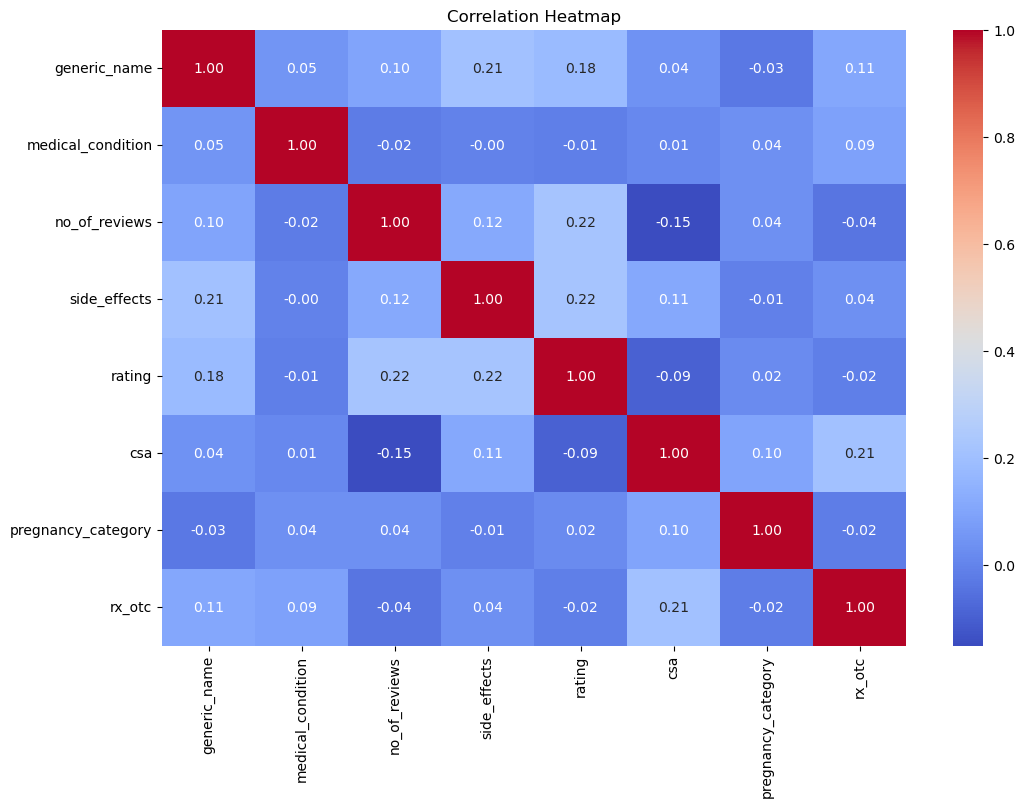

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame (e.g., from the COVID clinical trials or web attacks dataset)

# Compute correlation only on numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [56]:
 data_ver4 =pd.read_csv('drugs_side_effects_drugs_com.csv')

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
 medical_condition_counts =data_ver4['medical_condition'].value_counts().sort_values(ascending=False)
 print(" \n Medical condition occurrence and frequency (sorted from highest to lowest):")
 print(medical_condition_counts)

 
 Medical condition occurrence and frequency (sorted from highest to lowest):
medical_condition
Pain                                                                 264
Colds & Flu                                                          245
Acne                                                                 238
Hypertension                                                         177
Osteoarthritis                                                       129
Hayfever                                                             124
Eczema                                                               122
AIDS/HIV                                                             109
Diabetes (Type 2)                                                    104
Psoriasis                                                             93
GERD (Heartburn)                                                      77
Pneumonia                                                             72
Bronchitis                 

In [69]:
 medical_condition_counts.to_csv('medical_condition_counts.csv')

In [70]:
 from collections import Counter
 import re

In [71]:
 def extract_side_effects(text):
     return [effect.strip() for effect in re.split(r'[;]', text)]
 

In [72]:
 side_effects =data_ver4['side_effects'].dropna().apply(extract_side_effects).explode()
 side_effect_counts =side_effects.value_counts().sort_values(ascending=False)

In [73]:
 print("\nSide effects occurrence and frequency (sorted from highest to lowest):")
 print(side_effect_counts)


Side effects occurrence and frequency (sorted from highest to lowest):
side_effects
hives                                                                                                                                                                                                                                                                              1788
difficult breathing                                                                                                                                                                                                                                                                1130
difficulty breathing                                                                                                                                                                                                                                                                450
itching                                                                    

In [74]:
 side_effect_counts.to_csv('side_effect_counts.csv')


In [75]:
def extract_drug_classes(text):
    return [effect.strip() for effect in re.split(r'[,]', text)]
 

In [77]:
drug_classes =data_ver4['drug_classes'].dropna().apply(extract_drug_classes).explode()
drug_classes_counts =drug_classes.value_counts().sort_values(ascending=False)

In [78]:
print("\nDrug Classes occurrence and frequency (sorted from highest to lowest):")
print(drug_classes_counts)


Drug Classes occurrence and frequency (sorted from highest to lowest):
drug_classes
Upper respiratory combinations                     245
Topical acne agents                                125
Topical steroids                                    94
Unknown                                             83
Antihistamines                                      82
                                                  ... 
CD52 monoclonal antibodies                           1
Smoking cessation agents                             1
f.parentNode&&f.parentNode.removeChild(f)):a()}      1
Mouth and throat products                            1
Adamantane antivirals                                1
Name: count, Length: 246, dtype: int64


In [79]:
drug_classes_counts.to_csv('drug_classes_counts.csv')

In [81]:
def has_hives(text):
     return 'hives' in text.lower()
data_ver4['Hives'] = data_ver4['side_effects'].apply(has_hives)

In [82]:
def has_difficult_breathing(text):
    return 'difficult breathing' in text.lower() or 'difficulty breathing' in text.lower()
data_ver4['Difficult Breathing'] =data_ver4['side_effects'].apply(has_difficult_breathing)

In [83]:
def has_itching(text):
     return 'itching' in text.lower()
data_ver4['Itching'] =data_ver4['side_effects'].apply(has_itching)

In [84]:
def is_usc(text):
    return 'Upper respiratory combinations' in text
data_ver4['Upper respiratory combinations'] =data_ver4['drug_classes'].apply(is_usc)

In [85]:
 def is_steriods(text):
      return 'Topical steroids' in text
 data_ver4['Topical steroids'] =data_ver4['drug_classes'].apply(is_steriods)

In [86]:
 def is_acne(text):
     return 'Topical acne agents' in text
 data_ver4['Topical acne agents'] =data_ver4['drug_classes'].apply(is_acne)


In [87]:
 def has_pain(text):
     return 'Pain' in text
 data_ver4['Pain'] =data_ver4['medical_condition'].apply(has_pain)

In [88]:
 def has_colds_and_flu(text):
     return 'Colds & Flu' in text
 data_ver4['Colds & Flu'] =data_ver4['medical_condition'].apply(has_colds_and_flu)

In [89]:
def has_acne(text):
    return 'Acne' in text
data_ver4['Acne'] =data_ver4['medical_condition'].apply(has_acne)


In [90]:
import seaborn as sns

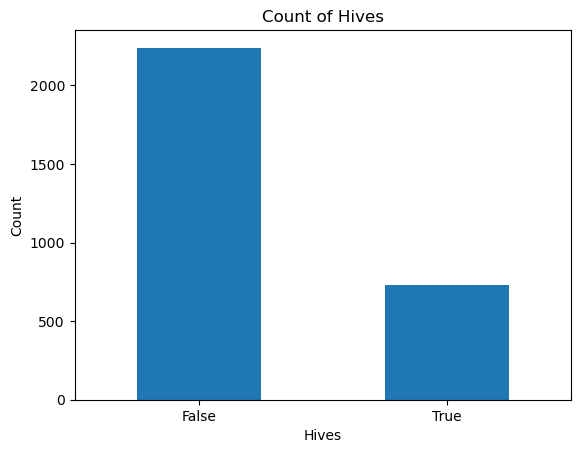

In [91]:
 data_ver4['Hives'].value_counts().plot(kind='bar')
 plt.title('Count of Hives')
 plt.xlabel('Hives')
 plt.ylabel('Count')
 plt.xticks([0, 1], ['False', 'True'], rotation=0)
 plt.show()

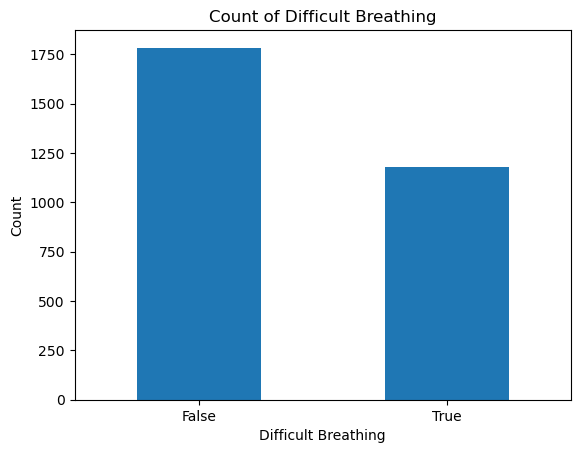

In [92]:
 data_ver4['Difficult Breathing'].value_counts().plot(kind='bar')
 plt.title('Count of Difficult Breathing')
 plt.xlabel('Difficult Breathing')
 plt.ylabel('Count')
 plt.xticks([0, 1], ['False', 'True'], rotation=0)
 plt.show()

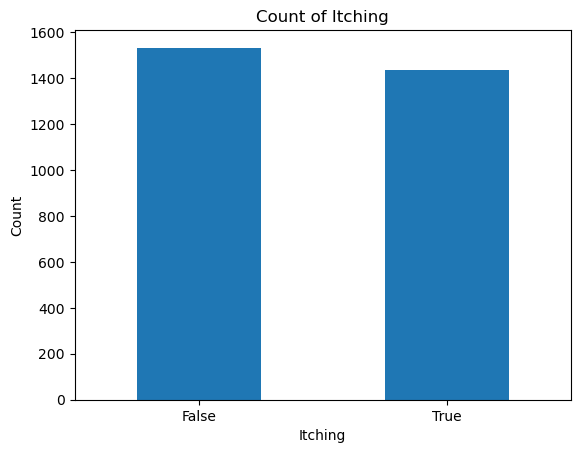

In [93]:
 data_ver4['Itching'].value_counts().plot(kind='bar')
 plt.title('Count of Itching')
 plt.xlabel('Itching')
 plt.ylabel('Count')
 plt.xticks([0, 1], ['False', 'True'], rotation=0)
 plt.show()
